# UN Comtrade Database

La [United Nations Comtrade database](https://comtradeplus.un.org) da acceso a datos globales de comercio internacional:
- [Trade Data](https://comtradeplus.un.org/TradeFlow)

In [2]:
import comtradeapicall
comtradeapicall.listReference()

,category,variable,description,fileuri
0,dataitem,Trade data items,List of data items/variables used in UN Comtrade,https://comtradeapi.un.org/files/v1/app/refere...
1,freq,Frequency,The time interval at which observations occur,https://comtradeapi.un.org/files/v1/app/refere...
2,flow,Trade Flow,"Trade flow or sub-flow (exports, re-exports, i...",https://comtradeapi.un.org/files/v1/app/refere...
3,mot,Mode of Transports,The mode of transport used when goods enter or...,https://comtradeapi.un.org/files/v1/app/refere...
4,partner,Partner country/area,The partner country or geographic area for the...,https://comtradeapi.un.org/files/v1/app/refere...
5,reporter,Reporter,The country or geographic area to which the me...,https://comtradeapi.un.org/files/v1/app/refere...
6,qtyunit,Units of quantity,The unit for quantity and alternate quantity d...,https://comtradeapi.un.org/files/v1/app/refere...
7,mos,Mode of Supply,The mode of supply on delivery of services (tr...,https://comtradeapi.un.org/files/v1/app/refere...
8,customs,Customs Procedure Code,Customs or statistical procedure,https://comtradeapi.un.org/files/v1/app/refere...
9,cmd:B4,Product [BEC Rev. 4],The classification of BEC Rev.4 – goods and se...,https://comtradeapi.un.org/files/v1/app/refere...


   typeCode freqCode  refPeriodId  refYear  refMonth  period  reporterCode  \
0         C        M     20240901     2024         9  202409           251   
1         C        M     20240901     2024         9  202409           276   
2         C        M     20240901     2024         9  202409           826   
3         C        M     20240901     2024         9  202409           842   
4         C        M     20241001     2024        10  202410           251   
5         C        M     20241001     2024        10  202410           276   
6         C        M     20241001     2024        10  202410           826   
7         C        M     20241001     2024        10  202410           842   
8         C        M     20241101     2024        11  202411           251   
9         C        M     20241101     2024        11  202411           276   
10        C        M     20241101     2024        11  202411           826   
11        C        M     20241101     2024        11  202411    

<Axes: title={'center': 'UN Comtrade HS for several countries'}, ylabel='Exports [USD bill.]'>

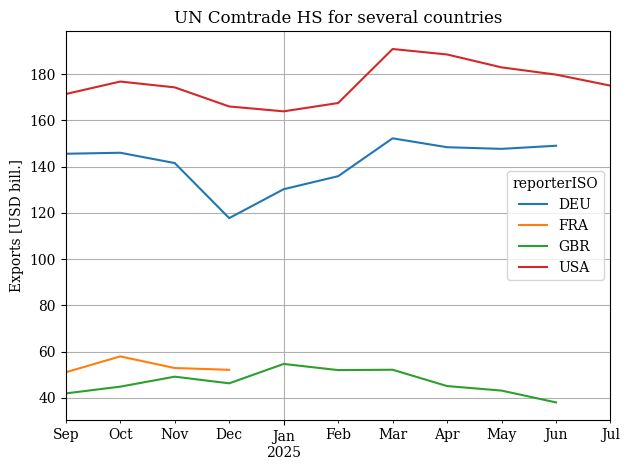

In [95]:
df = comtradeapicall.getFinalData("f630fd3d9e974788a68e650956d889a7",
                             typeCode='C',
                             freqCode='M',
                             clCode='HS',
                             period='202409,202410,202411,202412,202501,202502,202503,202504,202505,202506,202507,202508',
                             reporterCode='842,276,251,826', # 0=World, 36=Australia, 842=US, 276=Germany, 156=China, 251=France, 826=UK, 528=Netherlands
                             cmdCode='TOTAL', # 91=
                             flowCode='X', # X=Exports, M=Imports
                             partnerCode='0',
                             partner2Code=None,
                             customsCode=None,
                             motCode=None,
                             maxRecords=500,
                             format_output='JSON',
                             aggregateBy=None,
                             breakdownMode='classic',
                             countOnly=None,
                             includeDesc=True
)
import pandas as pd

print(df)
df_ = df[['period', 'primaryValue', 'reporterISO']].copy()
df_['period'] = pd.to_datetime(df_['period'].astype(str), format='%Y%m')
df_['primaryValue'] = df_['primaryValue']/1e9

df_.pivot(index='period', columns='reporterISO', values='primaryValue').plot(xlabel='', ylabel='Exports [USD bill.]', title='UN Comtrade HS for several countries')


In [77]:
df

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
0,C,M,20240901,2024,9,202409,251,FRA,France,X,...,NaN,False,0.0,False,None,5.107422e+10,5.107422e+10,0,False,True
1,C,M,20240901,2024,9,202409,276,DEU,Germany,X,...,NaN,False,0.0,False,None,1.455670e+11,1.455670e+11,0,False,True
2,C,M,20240901,2024,9,202409,826,GBR,United Kingdom,X,...,NaN,False,0.0,False,None,4.192999e+10,4.192999e+10,0,False,True
3,C,M,20240901,2024,9,202409,842,USA,USA,X,...,NaN,False,0.0,False,None,1.713956e+11,1.713956e+11,0,False,True
4,C,M,20241001,2024,10,202410,251,FRA,France,X,...,NaN,False,0.0,False,None,5.792928e+10,5.792928e+10,0,False,True
5,C,M,20241001,2024,10,202410,276,DEU,Germany,X,...,NaN,False,0.0,False,None,1.460001e+11,1.460001e+11,0,False,True
6,C,M,20241001,2024,10,202410,826,GBR,United Kingdom,X,...,NaN,False,0.0,False,None,4.484914e+10,4.484914e+10,0,False,True
7,C,M,20241001,2024,10,202410,842,USA,USA,X,...,0.0,True,0.0,False,None,1.767911e+11,1.767911e+11,4,False,True
8,C,M,20241101,2024,11,202411,251,FRA,France,X,...,NaN,False,0.0,False,None,5.290272e+10,5.290272e+10,0,False,True
9,C,M,20241101,2024,11,202411,276,DEU,Germany,X,...,NaN,False,0.0,False,None,1.415478e+11,1.415478e+11,0,False,True


In [35]:
','.join([f'2025{i:02}' for i in range(1,13)])

'202501,202502,202503,202504,202505,202506,202507,202508,202509,202510,202511,202512'

In [47]:
','.join([f'{year}{i:02}' for i in range(1,13) for year in range(2023,2025)])

'202301,202401,202302,202402,202303,202403,202304,202404,202305,202405,202306,202406,202307,202407,202308,202408,202309,202409,202310,202410,202311,202411,202312,202412'

In [57]:

start_period = '202312'
# parse YYYYMM into a Timestamp
start = pd.Timestamp('2024-09')

# generate n_months consecutive periods
periods = [(start + pd.DateOffset(months=i)).strftime("%Y%m") for i in range(12)]

",".join(periods)

'202409,202410,202411,202412,202501,202502,202503,202504,202505,202506,202507,202508'

In [87]:
df = comtradeapicall.getFinalData("f630fd3d9e974788a68e650956d889a7",
                             typeCode='C',
                             freqCode='M',
                             clCode='HS',
                             period='202409,202410,202411,202412,202501,202502,202503,202504,202505,202506,202507,202508',
                             reporterCode='842,276,251,826', # 0=World, 36=Australia, 842=US, 276=Germany, 156=China, 251=France, 826=UK, 528=Netherlands
                             cmdCode='TOTAL', # 91=
                             flowCode='X', # X=Exports, M=Imports
                             partnerCode='0',
                             partner2Code=None,
                             customsCode=None,
                             motCode=None,
                             maxRecords=500,
                             format_output='JSON',
                             aggregateBy=None,
                             breakdownMode='classic',
                             countOnly=None,
                             includeDesc=True
)
df

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
0,C,M,20240901,2024,9,202409,251,FRA,France,X,...,NaN,False,0.0,False,None,5.107422e+10,5.107422e+10,0,False,True
1,C,M,20240901,2024,9,202409,276,DEU,Germany,X,...,NaN,False,0.0,False,None,1.455670e+11,1.455670e+11,0,False,True
2,C,M,20240901,2024,9,202409,826,GBR,United Kingdom,X,...,NaN,False,0.0,False,None,4.192999e+10,4.192999e+10,0,False,True
3,C,M,20240901,2024,9,202409,842,USA,USA,X,...,NaN,False,0.0,False,None,1.713956e+11,1.713956e+11,0,False,True
4,C,M,20241001,2024,10,202410,251,FRA,France,X,...,NaN,False,0.0,False,None,5.792928e+10,5.792928e+10,0,False,True
5,C,M,20241001,2024,10,202410,276,DEU,Germany,X,...,NaN,False,0.0,False,None,1.460001e+11,1.460001e+11,0,False,True
6,C,M,20241001,2024,10,202410,826,GBR,United Kingdom,X,...,NaN,False,0.0,False,None,4.484914e+10,4.484914e+10,0,False,True
7,C,M,20241001,2024,10,202410,842,USA,USA,X,...,0.0,True,0.0,False,None,1.767911e+11,1.767911e+11,4,False,True
8,C,M,20241101,2024,11,202411,251,FRA,France,X,...,NaN,False,0.0,False,None,5.290272e+10,5.290272e+10,0,False,True
9,C,M,20241101,2024,11,202411,276,DEU,Germany,X,...,NaN,False,0.0,False,None,1.415478e+11,1.415478e+11,0,False,True
